# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset

df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_ZArchiver_1.csv")
df.head()

,userName,score,at,content
0,Muhammad Rosada,1,2024-06-17 03:50:48,Aplikasi bagus mudah di fahami tapi tolong sup...
1,Muhammad Farhan,1,2024-06-17 03:45:59,gk bisa akses file
2,Rizki Almubarok,2,2024-06-17 03:41:19,Knpa lah ini mau buka data aja akses di tolak ...
3,Dimas Ae,5,2024-06-17 03:33:49,Kerja bagus
4,Kenzy Jovanda,2,2024-06-17 03:29:45,Jelek


In [3]:
# Menampilkan Column Content, Username, dan at.

df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Aplikasi bagus mudah di fahami tapi tolong sup...,Muhammad Rosada,2024-06-17 03:50:48
1,gk bisa akses file,Muhammad Farhan,2024-06-17 03:45:59
2,Knpa lah ini mau buka data aja akses di tolak ...,Rizki Almubarok,2024-06-17 03:41:19
3,Kerja bagus,Dimas Ae,2024-06-17 03:33:49
4,Jelek,Kenzy Jovanda,2024-06-17 03:29:45
...,...,...,...
995,Bagus,Abraham The Movie,2024-05-05 12:52:28
996,Apk buruk gak bisa masukkan mod mincraft seper...,Falzz akun ke 2,2024-05-05 12:51:01
997,Ada rege ga nih,Arkan Muhamad,2024-05-05 12:27:37
998,Apk yang lumayan bagus tapi membingungkan,Rahman Aman,2024-05-05 12:05:10


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   1000 non-null   object
 1   userName  1000 non-null   object
 2   at        1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.

df.describe()

,content,userName,at
count,1000,1000,1000
unique,939,999,1000
top,Bagus,Haikal,2024-06-17 03:50:48
freq,20,2,1


# **Pre - Processing**


1.   Cleaning Data
2.   Case Folding
3.   Normalization
4.   Stopword
5.   Tokenize
6.   Stemming
7.   Translate
8.   Labeling

# **Cleaning Data & Case Folding**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.

df.shape

(1000, 3)

In [7]:
# Menghapus data yang duplicate

df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat

df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong

df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.

df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
# Mengetahui jumlah berapa baris dan kolom setelahnya

df.shape

(939, 3)

In [12]:
# Fungsi Cleaning Text

def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text)

  return text

In [13]:
# Fungsi Hapus Emoji

def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan Fungsi Cleaning Text, Emoji, dan Case Folding yang sudah dibuat kedalam column 'content'

df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,aplikasi bagus mudah di fahami tapi tolong sup...,Muhammad Rosada,2024-06-17 03:50:48
1,gk bisa akses file,Muhammad Farhan,2024-06-17 03:45:59
2,knpa lah ini mau buka data aja akses di tolak ...,Rizki Almubarok,2024-06-17 03:41:19
3,kerja bagus,Dimas Ae,2024-06-17 03:33:49
4,jelek,Kenzy Jovanda,2024-06-17 03:29:45
...,...,...,...
994,kenapa aplikasi yang saya mau install tidak valid,Gilang Zain,2024-05-05 13:13:36
996,apk buruk gak bisa masukkan mod mincraft seper...,Falzz akun ke 2,2024-05-05 12:51:01
997,ada rege ga nih,Arkan Muhamad,2024-05-05 12:27:37
998,apk yang lumayan bagus tapi membingungkan,Rahman Aman,2024-05-05 12:05:10


# **Normalization**

In [15]:
# Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : "",
        "grafick" : "grafik",
        "bngt" : "banget",
        "sheebal" : "sebal",
        "kemare" : "kemarin",
        "dislek" : "dislike",
        "ngk" : "ngga",
        "mobeli" : "mobile"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,aplikasi bagus mudah di fahami tapi tolong sup...,Muhammad Rosada,2024-06-17 03:50:48
1,gk bisa akses file,Muhammad Farhan,2024-06-17 03:45:59
2,kenapaa lah ini mau buka data aja akses di tol...,Rizki Almubarok,2024-06-17 03:41:19
3,kerja bagus,Dimas Ae,2024-06-17 03:33:49
4,jelek,Kenzy Jovanda,2024-06-17 03:29:45
...,...,...,...
994,kenapa aplikasi yang saya mau install tidak valid,Gilang Zain,2024-05-05 13:13:36
996,aplikasi buruk tidak bisa masukkan mod mincraf...,Falzz akun ke 2,2024-05-05 12:51:01
997,ada rege ga nih,Arkan Muhamad,2024-05-05 12:27:37
998,aplikasi yang lumayan bagus tapi membingunggaan,Rahman Aman,2024-05-05 12:05:10


# **Stopwords**

In [16]:
# Menginstall Library Sastrawi

!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,aplikasi bagus mudah fahami tolong supportkan ...,Muhammad Rosada,2024-06-17 03:50:48
1,gk akses file,Muhammad Farhan,2024-06-17 03:45:59
2,kenapaa lah mau buka data aja akses tolak mulu...,Rizki Almubarok,2024-06-17 03:41:19
3,kerja bagus,Dimas Ae,2024-06-17 03:33:49
4,jelek,Kenzy Jovanda,2024-06-17 03:29:45
...,...,...,...
994,aplikasi saya mau install valid,Gilang Zain,2024-05-05 13:13:36
996,aplikasi buruk bisa masukkan mod mincraft map ...,Falzz akun ke 2,2024-05-05 12:51:01
997,rege ga nih,Arkan Muhamad,2024-05-05 12:27:37
998,aplikasi lumayan bagus membingunggaan,Rahman Aman,2024-05-05 12:05:10


# **Tokenize**

In [18]:
# Tokenize

tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [aplikasi, bagus, mudah, fahami, tolong, suppo...
1                                      [gk, akses, file]
2      [kenapaa, lah, mau, buka, data, aja, akses, to...
3                                         [kerja, bagus]
4                                                [jelek]
                             ...                        
994                [aplikasi, saya, mau, install, valid]
996    [aplikasi, buruk, bisa, masukkan, mod, mincraf...
997                                      [rege, ga, nih]
998           [aplikasi, lumayan, bagus, membingunggaan]
999                  [sekarang, bisa, ganti, nama, file]
Name: content, Length: 939, dtype: object

# **Stemming**

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_ZArchiver_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_ZArchiver_1.csv', encoding = 'latin1')
df_clean

,content
0,aplikasi bagus mudah fahami tolong supportkan ...
1,gk akses file
2,kenapaa lah mau buka data aja akses tolak mulu...
3,kerja bagus
4,jelek
...,...
934,aplikasi saya mau install valid
935,aplikasi buruk bisa masuk mod mincraft map addon
936,rege ga nih
937,aplikasi lumayan bagus membingunggaan


# **Translate**

In [21]:
# # Menginstall Library easynmt

# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# # Load Data Hasil Stemming

# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_ZArchiver_1.csv', encoding='latin1')

In [25]:
# # Menentukan Asal & Target Bahasa yang akan diterjemahkan

# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [26]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [27]:
# # Imputing NaN Values

# df2 = df_clean.fillna(method = 'pad')
# df2

In [28]:
# # Mengaplikasikan Fungsi Translate yang sudah dibuat kedalam column 'content'

# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_ZArchiver_1.csv')

In [29]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_ZArchiver_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi bagus mudah fahami tolong supportkan ...,Good app. Easy to understand. Please back up t...
1,1,gk akses file,no file access
2,2,kenapaa lah mau buka data aja akses tolak mulu...,"fontcolor="" # FFFF00""whydo you wanttoopentheda..."
3,3,kerja bagus,Good work.
4,4,jelek,ugly
...,...,...,...
934,934,aplikasi saya mau install valid,my application wants to install valid
935,935,aplikasi buruk bisa masuk mod mincraft map addon,bad application can log in mode mincraft map a...
936,936,rege ga nih,Rege ga hai
937,937,aplikasi lumayan bagus membingunggaan,The application's pretty good.


# **Labeling**

In [30]:
# Load Dataset Hasil Translate

df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_ZArchiver_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,aplikasi bagus mudah fahami tolong supportkan ...,Good app. Easy to understand. Please back up t...
1,1,gk akses file,no file access
2,2,kenapaa lah mau buka data aja akses tolak mulu...,"fontcolor="" # FFFF00""whydo you wanttoopentheda..."
3,3,kerja bagus,Good work.
4,4,jelek,ugly
...,...,...,...
934,934,aplikasi saya mau install valid,my application wants to install valid
935,935,aplikasi buruk bisa masuk mod mincraft map addon,bad application can log in mode mincraft map a...
936,936,rege ga nih,Rege ga hai
937,937,aplikasi lumayan bagus membingunggaan,The application's pretty good.


In [31]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK

!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [32]:
# Import Library yang dibutuhkan

import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
# Labeling With TextBlob

data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 293
Netral = 471
Negatif = 175

Total Data Seluruhnya : 939


In [34]:
# Melihat Status Sentimen

df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,aplikasi bagus mudah fahami tolong supportkan ...,Good app. Easy to understand. Please back up t...,Positif
1,1,gk akses file,no file access,Netral
2,2,kenapaa lah mau buka data aja akses tolak mulu...,"fontcolor="" # FFFF00""whydo you wanttoopentheda...",Netral
3,3,kerja bagus,Good work.,Positif
4,4,jelek,ugly,Negatif
...,...,...,...,...
934,934,aplikasi saya mau install valid,my application wants to install valid,Positif
935,935,aplikasi buruk bisa masuk mod mincraft map addon,bad application can log in mode mincraft map a...,Negatif
936,936,rege ga nih,Rege ga hai,Netral
937,937,aplikasi lumayan bagus membingunggaan,The application's pretty good.,Positif


In [35]:
# Menghapus Colum Unnamed: 0

data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,aplikasi bagus mudah fahami tolong supportkan ...,Good app. Easy to understand. Please back up t...,Positif
1,gk akses file,no file access,Netral
2,kenapaa lah mau buka data aja akses tolak mulu...,"fontcolor="" # FFFF00""whydo you wanttoopentheda...",Netral
3,kerja bagus,Good work.,Positif
4,jelek,ugly,Negatif
...,...,...,...
934,aplikasi saya mau install valid,my application wants to install valid,Positif
935,aplikasi buruk bisa masuk mod mincraft map addon,bad application can log in mode mincraft map a...,Negatif
936,rege ga nih,Rege ga hai,Netral
937,aplikasi lumayan bagus membingunggaan,The application's pretty good.,Positif


# **Visualization**


1.   Bar Plot
2.   Pie Chart
3.   Wordcloud



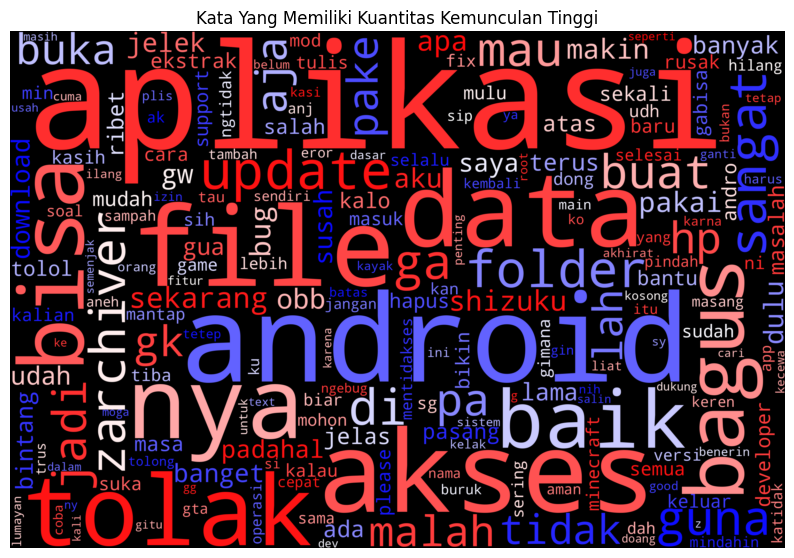

In [36]:
# Visualisasi Kata Yang Memiliki Kuantitas Kemunculan Paling Tinggi

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Kemunculan Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


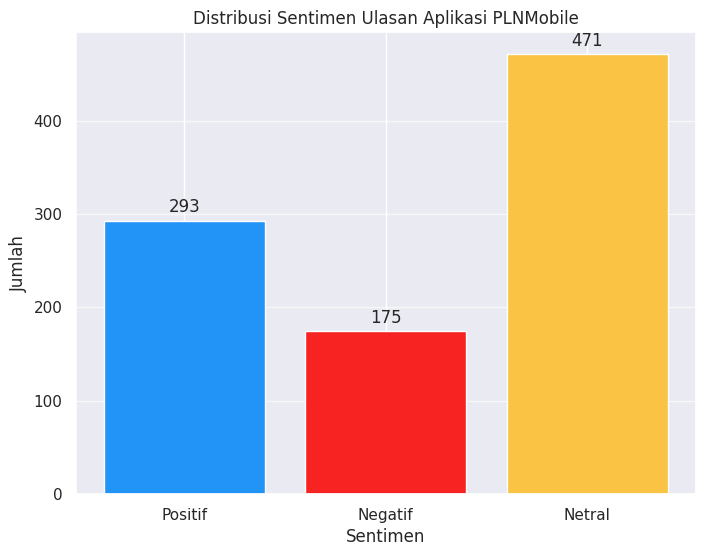

In [37]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PLNMobile")


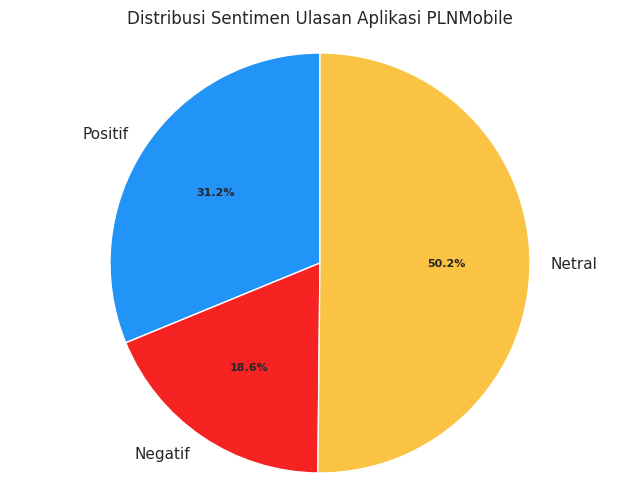

In [38]:
# Visualisasi Distribusi Sentimen Positif , Negatif , Netral Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PLNMobile")

In [39]:
# Menghapus Sentimen Netral

data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,aplikasi bagus mudah fahami tolong supportkan ...,Good app. Easy to understand. Please back up t...,Positif
3,kerja bagus,Good work.,Positif
4,jelek,ugly,Negatif
6,aplikasi bagus,Nice application.,Positif
7,alus anjayy minimal geme hd nya lah maaf agref...,Alus anjayy minimal geme hd sorry agref app yeah,Negatif
...,...,...,...
930,sangat bantu,Very helpful.,Positif
932,baik,Okay.,Positif
934,aplikasi saya mau install valid,my application wants to install valid,Positif
935,aplikasi buruk bisa masuk mod mincraft map addon,bad application can log in mode mincraft map a...,Negatif


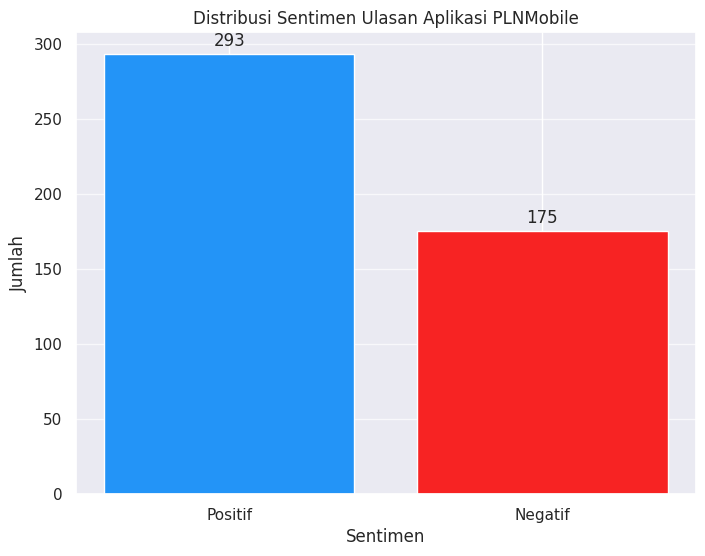

In [40]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Plot

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PLNMobile")


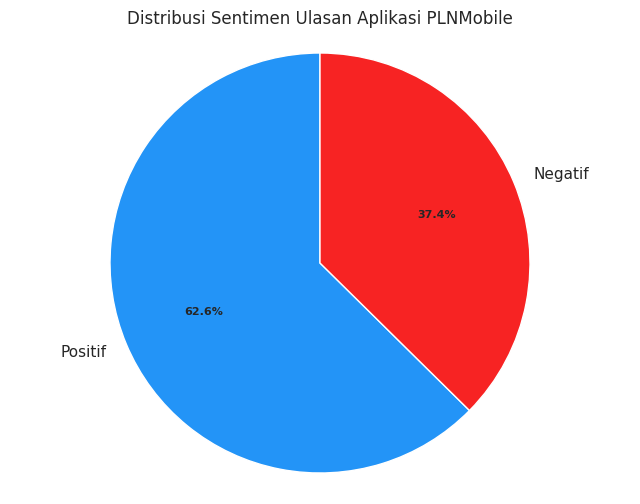

In [41]:
# Visualisasi Distribusi Sentimen Positif & Negatif Bar Pie Chart

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_pie_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    # Customize colors for each wedge
    colors = ['#2394f7', '#f72323', '#fac343']

    # Create the pie chart
    wedges, texts, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%',
                                      startangle=90, colors=colors)

    # Customize the wedge properties
    ax.axis('equal')  # Equal aspect ratio ensures a circular pie chart
    plt.setp(autotexts, size=8, weight='bold')

    # Add a title
    ax.set_title(title)

    plt.show()

# Call the pie chart function
show_pie_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi PLNMobile")

In [42]:
# Replace Data Sentimen

data = data.replace({'Positif':0, 'Negatif':1})
data

,content,content_en,sentimen
0,aplikasi bagus mudah fahami tolong supportkan ...,Good app. Easy to understand. Please back up t...,0
3,kerja bagus,Good work.,0
4,jelek,ugly,1
6,aplikasi bagus,Nice application.,0
7,alus anjayy minimal geme hd nya lah maaf agref...,Alus anjayy minimal geme hd sorry agref app yeah,1
...,...,...,...
930,sangat bantu,Very helpful.,0
932,baik,Okay.,0
934,aplikasi saya mau install valid,my application wants to install valid,0
935,aplikasi buruk bisa masuk mod mincraft map addon,bad application can log in mode mincraft map a...,1


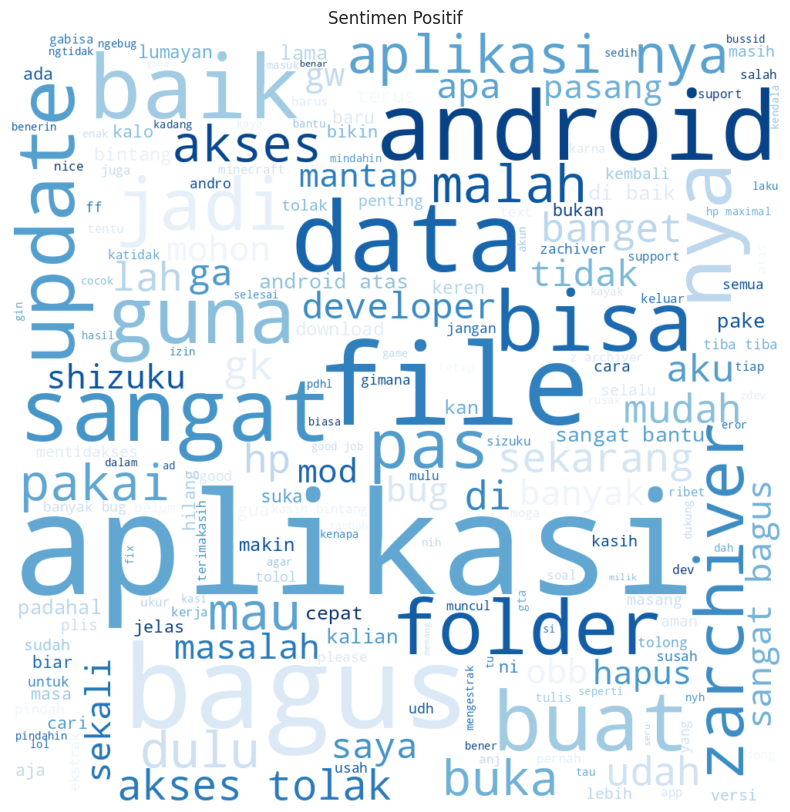

In [43]:
# Visualisasi Wordcould Positif & Negatif

data_positif = data[data['sentimen'] == 0]
data_negatif = data[data['sentimen'] == 1]

# Sentimen Positif

all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

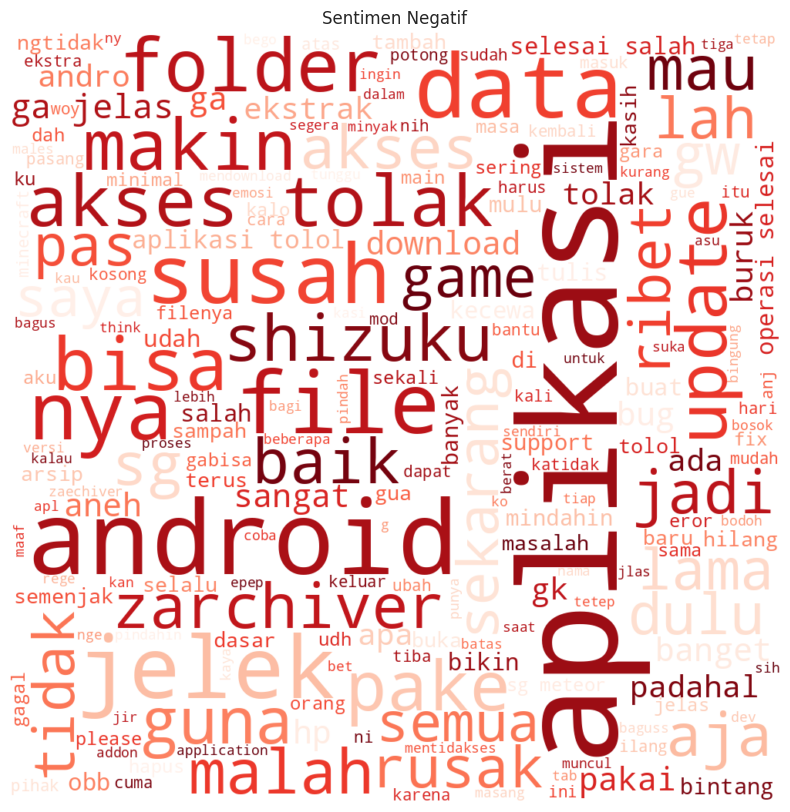

In [44]:
# Sentimen Negatif

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

In [45]:
# Menghitung Jumlah Sentimen Positif & Negatif

data['sentimen'].value_counts()

sentimen
0    293
1    175
Name: count, dtype: int64

# **Transormation & Data Preparation**

In [46]:
# Import Library yang dibutuhkan

from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.calibration import CalibratedClassifierCV


In [47]:
# Memisahkan data menjadi data latih dan data uji [ Splitting Data ]

X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [48]:
# Menggunakan TF - IDF Vectorizer untuk mengubah teks menjadi fitur numerik [ Text Vectorizer ]

vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [57]:
# Melakukan oversampling menggunakan Random Over-Sampling pada data latih

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_vec, y_train)

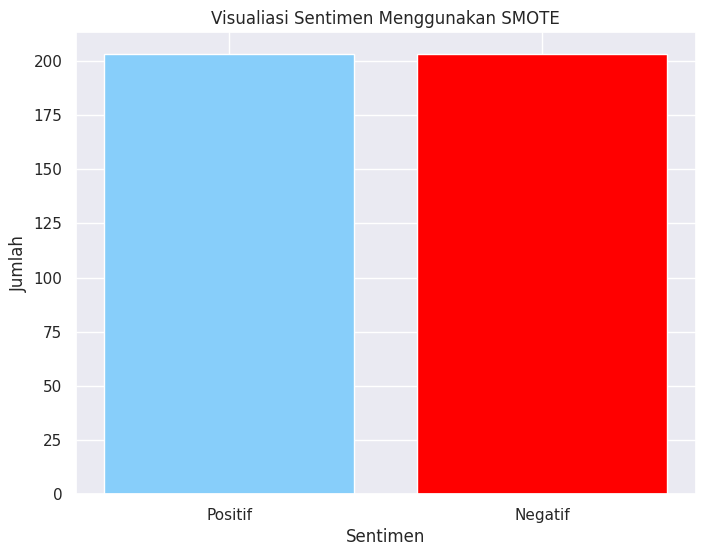

In [58]:
# Visualiasi data hasil resampling menggunakan SMOTE

sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['lightskyblue', 'red'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Positif', 'Negatif'])
plt.show()

# **Data Mining**

In [59]:
# Import Library Warning
import warnings
warnings.filterwarnings('ignore')

In [60]:
X_train_resampled.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
# Membangun Model Support vector Machine

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_resampled, y_train_resampled)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.7872340425531915
Akurasi untuk c = 0.05: 0.8014184397163121
Akurasi untuk c = 0.25: 0.8085106382978723
Akurasi untuk c = 0.5: 0.8014184397163121
Akurasi untuk c = 0.75: 0.8085106382978723
Akurasi untuk c = 1: 0.8085106382978723


In [63]:
# Menginisialisasi classifier SVM linier,
# membungkusnya dengan model kalibrasi untuk meningkatkan prediksi probabilitasnya,
# dan kemudian melatih model gabungan tersebut pada data pelatihan.

linear_svc = LinearSVC(C = 1.0)
calibrated_svc = CalibratedClassifierCV(linear_svc)
calibrated_svc.fit(X_train_vec, y_train)

CalibratedClassifierCV(estimator=LinearSVC())

# **Interpretation / Evaluation**


1.   Classification Report
2.   Confusion Matrix
3.   Classification Accuracy
4.   Classification Error




In [64]:
# Final Accuracy Score Model

print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.8085106382978723 


In [65]:
# Classification Report

from sklearn.metrics import confusion_matrix

# Evaluasi Model
y_pred = svm.predict(X_test_vec)
print('Akurasi Model Support Vector Machine : {:.4f}' .format(svm.score(X_test_vec, y_test)))

print("\nLaporan Klasifikasi :\n", classification_report(y_test, y_pred))

Akurasi Model Support Vector Machine : 0.8085

Laporan Klasifikasi :
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        90
           1       0.72      0.76      0.74        51

    accuracy                           0.81       141
   macro avg       0.79      0.80      0.80       141
weighted avg       0.81      0.81      0.81       141



In [66]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])

print('\nTrue Negatives (TN) = ', cm[1, 1])

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])



print('\nAccuracy = ', accuracy)

Confusion matrix

 [[75 15]
 [12 39]]

True Positives (TP) =  75

True Negatives (TN) =  39

False Positives (FP) =  15

False Negatives (FN) =  12

Accuracy =  0.8085106382978723


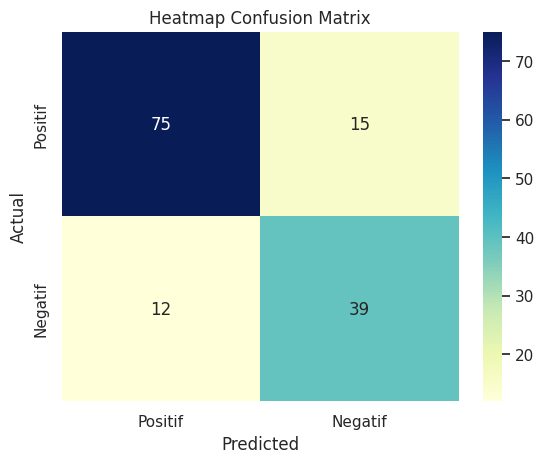

In [67]:
# Visualisasi Heatmap Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Positif', 'Negatif'],
                         index=['Positif', 'Negatif'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [68]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]


In [69]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8085


In [70]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1915


# **Testing**

In [71]:
# Input new text

new_text = input("\nMasukkan Teks Baru: ")
new_text_vec = vectorizer.transform([new_text])

# Predict sentiment and probability

predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

# Determine sentiment label and probability

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

# Output results

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")



Masukkan Teks Baru: Apk ZArchiver memang andalan saya, selalu saya pakai setiap saya butuh. Pemakaian sangat mudah, & sangat membantu untuk tugas pekerjaan saya. Sesuai dengan deskripsi, sangat berguna.
Hasil Analisis Sentimen Untuk Teks Baru: Positif
Probabilitas: 82.67%
Probabilitas: 82.67080728369811 %


In [72]:
# Input new text

new_text = input("\nMasukkan Teks Baru: ")
new_text_vec = vectorizer.transform([new_text])

# Predict sentiment and probability

predicted_sentimen = calibrated_svc.predict(new_text_vec)
predicted_proba = calibrated_svc.predict_proba(new_text_vec)

# Determine sentiment label and probability

if predicted_sentimen[0] == 0:
    sentimen_label = "Positif"
    probability = predicted_proba[0][0] * 100
elif predicted_sentimen[0] == 1:
    sentimen_label = "Negatif"
    probability = predicted_proba[0][1] * 100

# Output results

print("Hasil Analisis Sentimen Untuk Teks Baru:", sentimen_label)
print("Probabilitas: {:.2f}%".format(probability))
print("Probabilitas:", probability, "%")




Masukkan Teks Baru: Jelek Jir banyak bug mindahin file stuck 100% Terus padahal bikin Tab baru terus pindahin ke Tab barunya arsip rusak Mening File manager
Hasil Analisis Sentimen Untuk Teks Baru: Negatif
Probabilitas: 86.93%
Probabilitas: 86.92814951531858 %
